In [1]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
import datetime



import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, GlobalAveragePooling1D, Dropout,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
#Building the neural network
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras.layers import Input, LSTM, RepeatVector, Masking, TimeDistributed, Lambda
from tensorflow.keras.models import Model
from sklearn.manifold import TSNE



from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.preprocessing import StandardScaler


import seaborn as sns






In [2]:
#pip install umap-learn


In [3]:
tsne = TSNE()



In [4]:
import umap.umap_ as umap



reducer = umap.UMAP()



In [5]:
from functions import truncate_sequence,one_hot_split,preprocess_data,create_model,deeper_AE,deeper_AE4,binary_preprocess_data,Encoding

In [7]:


list_of_input_paths=["data/JAMMSM0917_nanopore2500.fa","data/sarscov2.fna",
                     "data/alphacov.fna",
"data/deltacov.fna","data/mers.fna"]




output_path = "data/data.txt"



colour=['royalblue','goldenrod','darkgreen','firebrick','slategrey']
labels=['nanopore','sarscov2','alphacov','deltacov','mers']


color_dict = dict(zip(labels,colour))
y2label=dict(zip(list(range(len(labels))),labels))






{'C', 'N', 'A', 'T', 'Y', 'S', 'K', 'W', 'R', 'M', 'G'} 11


/Users/nuozhouwang/Desktop/VAE genome/functions.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (49016, 111, 11)
Example sequence
-----------------------
DNA Sequence #1:
 CNATYSKWRM ... ACTGGCTTAA
One hot encoding of Sequence #1:
 [[0. 0. 1. ... 0. 1. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Labels:
 [[1 1 1 ... 2 2 2]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(36762, 111, 11) (36762, 2)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 111, 111)          54612     
_________________________________________________________________
lstm_37 (LSTM)               (None, 111, 128)          122880    
_________________________________________________________________
lstm_38 (LSTM)               (None, 111, 64)           49408     
_________________________________________________________________
lstm_39 (LSTM

/Users/nuozhouwang/Desktop/VAE genome/functions.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (48087, 211, 11)
Example sequence
-----------------------
DNA Sequence #1:
 CNATYSKWRM ... TCTCATTTTC
One hot encoding of Sequence #1:
 [[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Labels:
 [[1 1 1 ... 2 2 2]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(36065, 211, 11) (36065, 2)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_45 (LSTM)               (None, 211, 211)          188212    
_________________________________________________________________
lstm_46 (LSTM)               (None, 211, 128)          174080    
_________________________________________________________________
lstm_47 (LSTM)               (None, 211, 64)           49408     
_________________________________________________________________
lstm_48 (LSTM

/Users/nuozhouwang/Desktop/VAE genome/functions.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (41020, 514, 14)
Example sequence
-----------------------
DNA Sequence #1:
 CDNHATYVSK ... GGAATAATAA
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 0. 1. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Labels:
 [[1 1 1 ... 2 2 2]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(30765, 514, 14) (30765, 2)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 514, 514)          1087624   
_________________________________________________________________
lstm_55 (LSTM)               (None, 514, 128)          329216    
_________________________________________________________________
lstm_56 (LSTM)               (None, 514, 64)           49408     
_________________________________________________________________
lstm_57 (LSTM

/Users/nuozhouwang/Desktop/VAE genome/functions.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (34225, 1015, 15)
Example sequence
-----------------------
DNA Sequence #1:
 BCDNHATYVS ... CTATGATGTT
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Labels:
 [[1 1 1 ... 2 2 2]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(25668, 1015, 15) (25668, 2)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_63 (LSTM)               (None, 1015, 1015)        4185860   
_________________________________________________________________
lstm_64 (LSTM)               (None, 1015, 128)         585728    
_________________________________________________________________
lstm_65 (LSTM)               (None, 1015, 64)          49408     
_________________________________________________________________
lstm_66 (LS

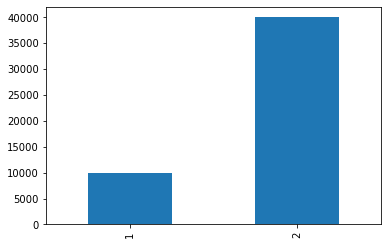

In [22]:
lr=1e-6
N=10000

n_class=5
n_epoch=100
batch_size=32

encoder_level=4




Atomic_size=[100]

Atomic_size=[2000]
bottleneck_dim=3

X_train_list,X_test_list,Y_train,Y_test,Train_encoded,\
Test_encoded,X_tSNE_encoded_list,X_tSNE_list,X_tSNE_test_encoded_list,\
X_tSNE_test_list,Umap_encoded=Encoding(list_of_input_paths,output_path,colour,labels,Atomic_size,N,n_class,\
lr,n_epoch,batch_size,encoder_level,bottleneck_dim,deeper_AE4,binary='True',LOAD='False')
    
print(len(Atomic_size),np.shape(Y_train),np.shape(Train_encoded))



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


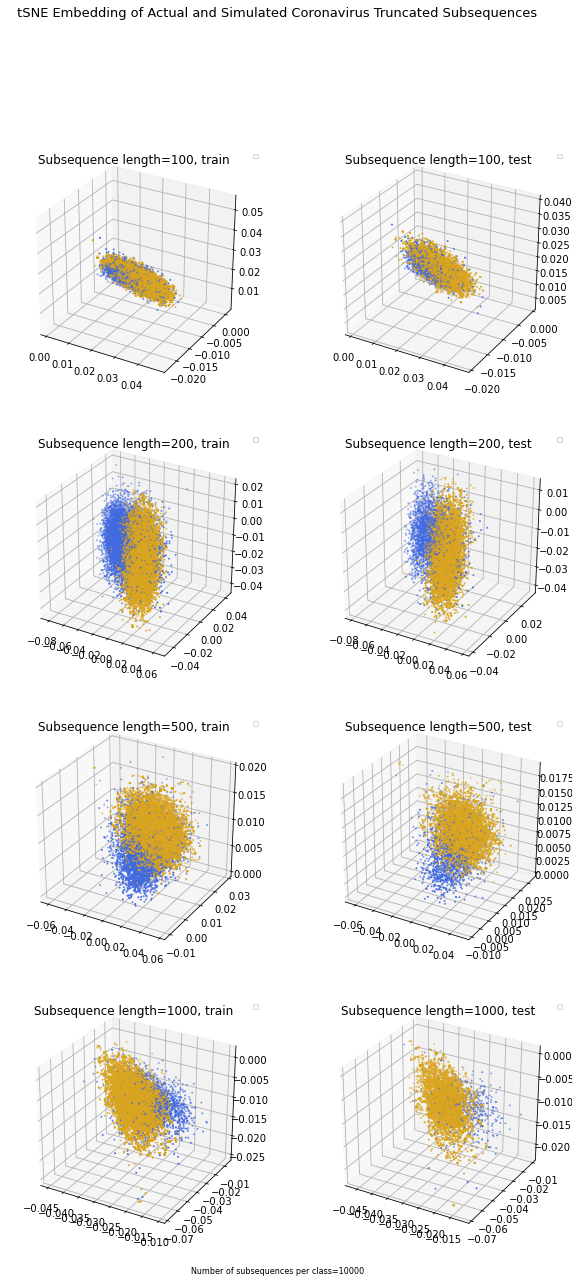

In [27]:


plt.figure(figsize = (10, 20))


for k in range(len(Atomic_size)):
    
    y=Y_train[k]
    y_test=Y_test[k]
    train_encoded=Train_encoded[k]
    test_encoded=Test_encoded[k]

    
    
    
    ax1 = plt.subplot(len(Atomic_size),2,k*2+1, projection='3d')
    c=[color_dict[y2label[i]] for i in y] 
   

    
    
    
    


    #sns.scatterplot(train_encoded[:,0], train_encoded[:,1], hue=[y2label[i] for i in y], legend='full', palette=color_dict)
    
    ax1.scatter(train_encoded[:,0], train_encoded[:,1], train_encoded[:,2],c=c,s=1)
    
    ax1.set_title('Subsequence length=%i, train'%Atomic_size[k])
    ax1.legend(fontsize=6)

# ax = fig.add_subplot(111, projection='3d') # Method 2





    ax2 = plt.subplot(len(Atomic_size),2,k*2+2, projection='3d')
    c=[color_dict[y2label[i]] for i in y_test]


    ax2.scatter(test_encoded[:,0], test_encoded[:,1], test_encoded[:,2],c=c,s=1)
    

    ax2.set_title('Subsequence length=%i, test'%Atomic_size[k])
    ax2.legend(fontsize=6)





plt.figtext(0.5,0.1,'Number of subsequences per class=%i'%(N), ha="center", fontsize=8)


plt.suptitle("tSNE Embedding of Actual and Simulated Coronavirus Truncated Subsequences", ha="center",fontsize=13)





plt.savefig("figures/Atomic_test_size%s_Nsample%i"%(str(Atomic_size),N))








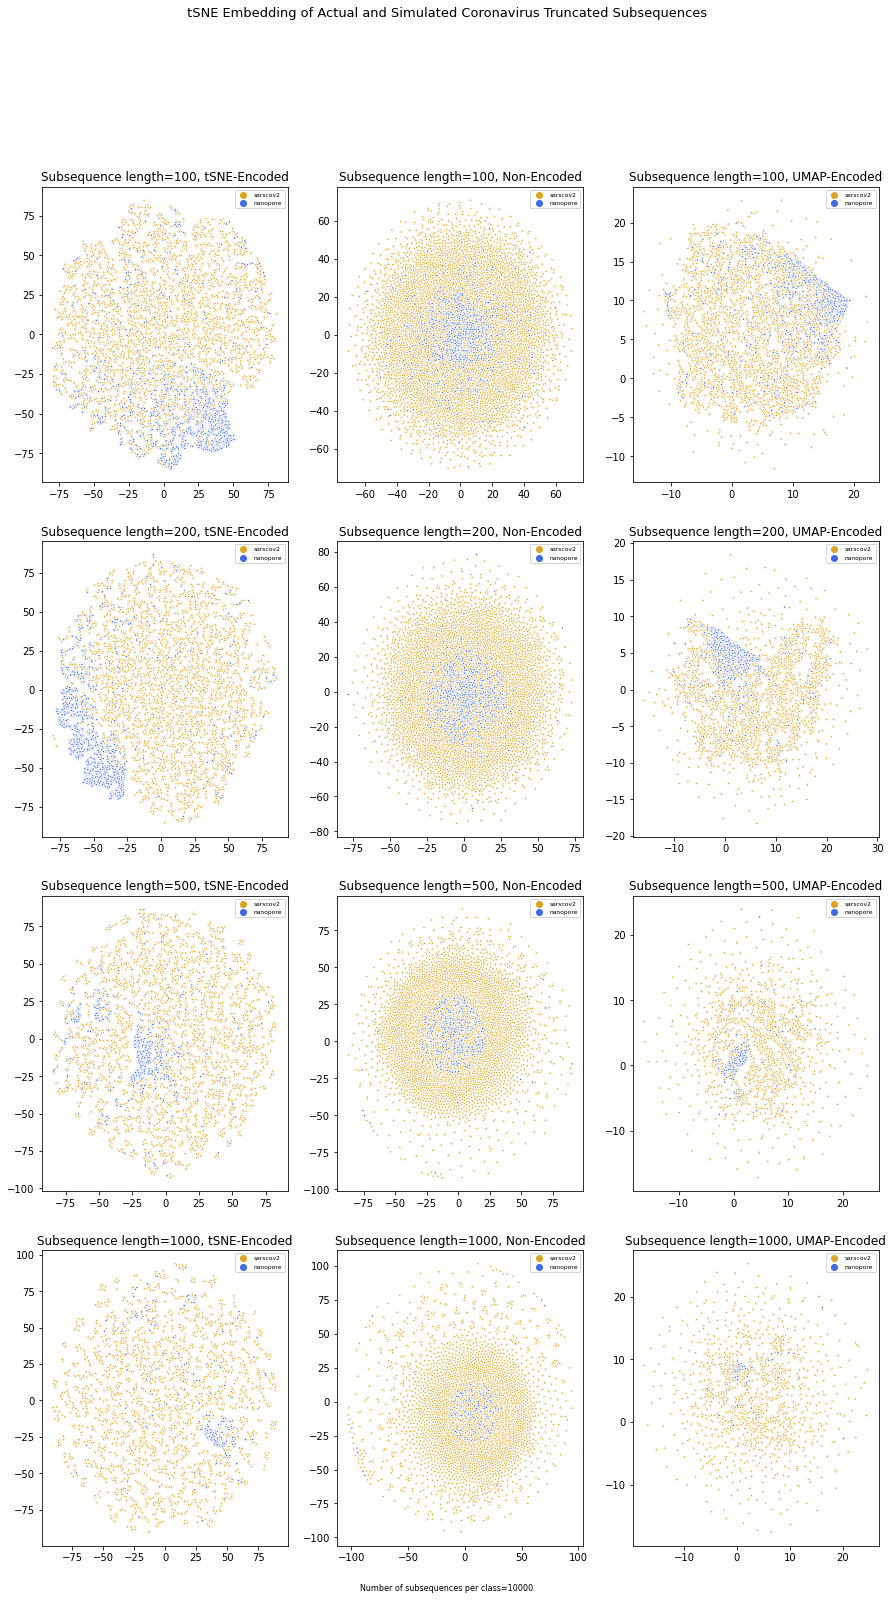

In [28]:


dot_size=5
plt.figure(figsize = (15, 25))


for k in range(len(Atomic_size)):

    y=Y_train[k]
    X_tSNE_encoded=X_tSNE_encoded_list[k]
    X_tSNE=X_tSNE_list[k]
    umap_encoded=Umap_encoded[k]


    ax1 = plt.subplot(len(Atomic_size),3,k*3+1)

    sns.scatterplot(X_tSNE_encoded[:,0], X_tSNE_encoded[:,1],s=dot_size, hue=[y2label[i] for i in y], legend='full', palette=color_dict)

    ax1.set_title('Subsequence length=%i, tSNE-Encoded'%Atomic_size[k])
    ax1.legend(fontsize=6)




    ax2 = plt.subplot(len(Atomic_size),3,k*3+2)

    sns.scatterplot(X_tSNE[:,0],X_tSNE[:,1], hue=[y2label[i] for i in y],s=dot_size, legend='full', palette=color_dict)
    ax2.set_title('Subsequence length=%i, Non-Encoded'%Atomic_size[k])
    ax2.legend(fontsize=6)


    ax3 = plt.subplot(len(Atomic_size),3,k*3+3)

    sns.scatterplot(umap_encoded[:,0],umap_encoded[:,1], hue=[y2label[i] for i in y],s=dot_size, legend='full', palette=color_dict)
    ax3.set_title('Subsequence length=%i, UMAP-Encoded'%Atomic_size[k])
    ax3.legend(fontsize=6)





plt.suptitle("tSNE Embedding of Actual and Simulated Coronavirus Truncated Subsequences",fontsize=13)


    


plt.figtext(0.5,0.1,'Number of subsequences per class=%i'%(N), ha="center", fontsize=8)




plt.savefig("figures/Atomic_size%s_Nsample%i"%(str(Atomic_size),N))






{'A', 'K', 'C', 'T', 'G'} 5


/Users/nuozhouwang/Desktop/VAE genome/functions.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (4929, 105, 5)
Example sequence
-----------------------
DNA Sequence #1:
 AKCTGCTGTT ... ACTGGCTTAA
One hot encoding of Sequence #1:
 [[1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
Labels:
 [[1 1 1 ... 2 2 2]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(3696, 105, 5) (3696, 2)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 105, 105)          46620     
_________________________________________________________________
lstm_1 (LSTM)                (None, 105, 128)          119808    
_________________________________________________________________
lstm_2 (LSTM)                (None, 105, 64)           49408     
_________________________________________________________________
lstm_3 (LSTM)                (None, 105, 32)      

/Users/nuozhouwang/Desktop/VAE genome/functions.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (4830, 210, 10)
Example sequence
-----------------------
DNA Sequence #1:
 AKCWYSTRMG ... TCTCATTTTC
One hot encoding of Sequence #1:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Labels:
 [[1 1 1 ... 2 2 2]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(3622, 210, 10) (3622, 2)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 210, 210)          185640    
_________________________________________________________________
lstm_10 (LSTM)               (None, 210, 128)          173568    
_________________________________________________________________
lstm_11 (LSTM)               (None, 210, 64)           49408     
_________________________________________________________________
lstm_12 (LSTM)  

/Users/nuozhouwang/Desktop/VAE genome/functions.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (4563, 511, 11)
Example sequence
-----------------------
DNA Sequence #1:
 NAKCWYSTRM ... GGAATAATAA
One hot encoding of Sequence #1:
 [[0. 1. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Labels:
 [[1 1 1 ... 2 2 2]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(3422, 511, 11) (3422, 2)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 511, 511)          1069012   
_________________________________________________________________
lstm_19 (LSTM)               (None, 511, 128)          327680    
_________________________________________________________________
lstm_20 (LSTM)               (None, 511, 64)           49408     
_________________________________________________________________
lstm_21 (LSTM)  

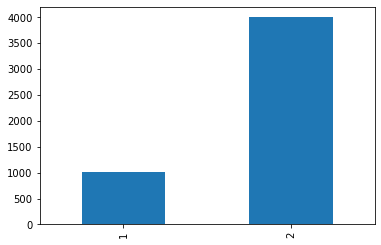

In [10]:
lr=1e-6
N=1000

n_class=5
n_epoch=100
batch_size=32

encoder_level=4





Atomic_size=[100,200,500]
bottleneck_dim=2

X_train_list,X_test_list,Y_train,Y_test,Train_encoded,\
Test_encoded,X_tSNE_encoded_list,X_tSNE_list,X_tSNE_test_encoded_list,\
X_tSNE_test_list,Umap_encoded=Encoding(list_of_input_paths,output_path,colour,labels,Atomic_size,N,n_class,\
lr,n_epoch,batch_size,encoder_level,bottleneck_dim,deeper_AE4,binary='True',LOAD='False')
    
print(len(Atomic_size),np.shape(Y_train),np.shape(Train_encoded))




In [8]:
pwd


'/Users/nuozhouwang/Desktop/VAE genome'

In [14]:
del(Atomic_size)

{'G', 'A', 'T', 'C'} 4
Input Shape (483, 204, 4)
Example sequence
-----------------------
DNA Sequence #1:
 GATCATTAAA ... TGCTTACGGT
One hot encoding of Sequence #1:
 [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]
Labels:
 [[1 1 1 ... 5 5 5]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(362, 204, 4) (362, 5)


/Users/nuozhouwang/Desktop/VAE genome/functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 204, 204)          170544    
_________________________________________________________________
lstm_1 (LSTM)                (None, 204, 32)           30336     
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 760       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 204, 5)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 204, 204)          171360    
_________________________________________________________________
lstm_4 (LSTM)                (None, 204, 32)           30336     
_________________________________________________________________
time_distributed (TimeDistri (None, 204, 1)            3

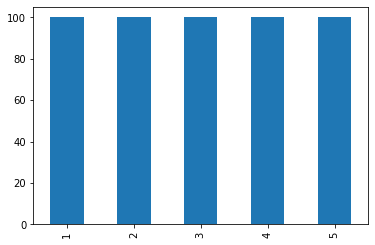

In [10]:

'''
repeat the experiment for different number of epochs to check for convergence
'''

 
Train_encoded=[]
Test_encoded=[]
X_tSNE_encoded_list=[]
X_tSNE_list=[]
X_tSNE_test_encoded_list=[]
X_tSNE_test_list=[]
Y=[]
Y_test=[]



   

atomic_size=200
Epochs=[2,50,100,500]
    

preprocess_data(list_of_input_paths,output_path,atomic_size,N,counting_method='truncated_sequence')
df = pd.read_table('data/data.txt')
df['class'].value_counts().sort_index().plot.bar()

X_train,y_train,X_test,y_test=one_hot_split(df,atomic_size,test_size=0.25)


'''
lets change the dimension of the learned representation to 3 dimension later
and cut the t-SNE embedding

'''
encoder_decoder = create_model(n_class,X_train,lr,activation='tanh')


checkpoint_path = "training/cp-actual-{L=%i}.ckpt"%atomic_size
checkpoint_dir = os.path.dirname(checkpoint_path)
#EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss')
for n_epoch in Epochs:
    #latest = tf.train.latest_checkpoint(checkpoint_dir)
    #encoder_decoder.load_weights(latest)
    #encoder_decoder.load_weights(checkpoint_path)
    encoder_decoder_history=encoder_decoder.fit(X_train, X_train, batch_size,steps_per_epoch= 1, epochs=n_epoch,  callbacks=[EarlyStopping], verbose=0)
    encoder_decoder.save_weights(checkpoint_path)
    print(encoder_decoder_history.history['loss'])
    encoder=Model(inputs=encoder_decoder.inputs, outputs=encoder_decoder.layers[2].output)
    train_encoded = encoder.predict(X_train)
    validation_encoded = encoder.predict(X_test)

    y=[np.argmax(i) for i in y_train]
    Y.append(y)
    y_test=[np.argmax(i) for i in y_test]
    Y_test.append(y_test)

    X_tSNE_encoded=tsne.fit_transform(train_encoded)
    X_tSNE_encoded_list.append(X_tSNE_encoded)
    X_tSNE_test_encoded=tsne.fit_transform(validation_encoded)
    X_tSNE_test_encoded_list.append(X_tSNE_test_encoded)

    X_tSNE=tsne.fit_transform(X_train[:, :, 0])
    X_tSNE_list.append(X_tSNE)
    X_tSNE_test=tsne.fit_transform(X_test[:, :, 0])
    X_tSNE_test_list.append(X_tSNE_test)




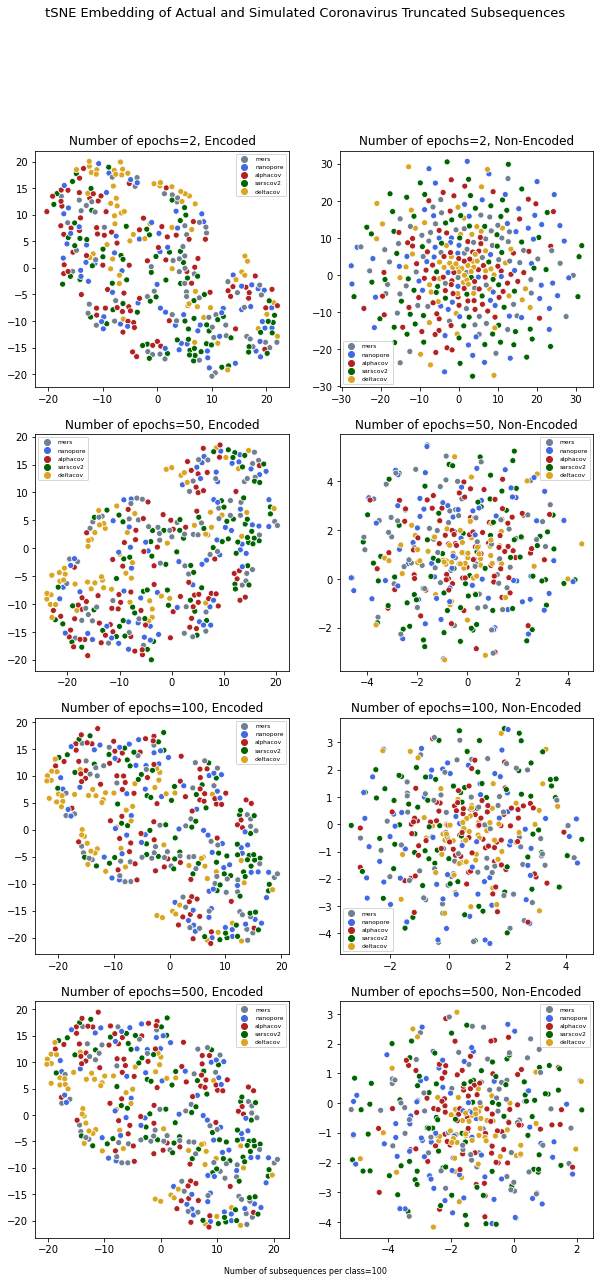

In [11]:
plt.figure(figsize = (10, 20))



for k in range(len(Epochs)):
    
    
    y=Y[k]
    X_tSNE_encoded=X_tSNE_encoded_list[k]
    X_tSNE=X_tSNE_list[k]
    

    ax1 = plt.subplot(len(Epochs),2,k*2+1)

    sns.scatterplot(X_tSNE_encoded[:,0], X_tSNE_encoded[:,1], hue=[y2label[i] for i in y], legend='full', palette=color_dict)

    ax1.set_title('Number of epochs=%i, Encoded'%Epochs[k])
    ax1.legend(fontsize=6)




    ax2 = plt.subplot(len(Epochs),2,k*2+2)

    sns.scatterplot(X_tSNE[:,0],X_tSNE[:,1], hue=[y2label[i] for i in y], legend='full', palette=color_dict)
    ax2.set_title('Number of epochs=%i, Non-Encoded'%Epochs[k])
    ax2.legend(fontsize=6)




plt.suptitle("tSNE Embedding of Actual and Simulated Coronavirus Truncated Subsequences",fontsize=13)


    


plt.figtext(0.5,0.1,'Number of subsequences per class=%i'%(N), ha="center", fontsize=8)




plt.savefig("figures/N_epochs%s_Nsample%i"%(str(Epochs),N))




{'A', 'T', 'K', 'G', 'C'} 5


/Users/nuozhouwang/Desktop/VAE genome/functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (4916, 105, 5)
Example sequence
-----------------------
DNA Sequence #1:
 ATKGCATTAA ... GCTGTCACTC
One hot encoding of Sequence #1:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]]
Labels:
 [[1 1 1 ... 5 5 5]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(3687, 105, 5) (3687, 5)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 105, 105)          46620     
_________________________________________________________________
lstm_26 (LSTM)               (None, 105, 32)           17664     
_________________________________________________________________
lstm_27 (LSTM)               (None, 3)                 432       
_______________________________________

/Users/nuozhouwang/Desktop/VAE genome/functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (4830, 210, 10)
Example sequence
-----------------------
DNA Sequence #1:
 YRWATSKGCM ... TGCTTACGGT
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
Labels:
 [[1 1 1 ... 5 5 5]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(3622, 210, 10) (3622, 5)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 210, 210)          185640    
_________________________________________________________________
lstm_31 (LSTM)               (None, 210, 32)           31104     
_________________________________________________________________
lstm_32 (LSTM)               (None, 3)                 432       
_______

/Users/nuozhouwang/Desktop/VAE genome/functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (4563, 511, 11)
Example sequence
-----------------------
DNA Sequence #1:
 YRWNATSKGC ... GCTCGAACTG
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
Labels:
 [[1 1 1 ... 5 5 5]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(3422, 511, 11) (3422, 5)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_35 (LSTM)               (None, 511, 511)          1069012   
_________________________________________________________________
lstm_36 (LSTM)               (None, 511, 32)           69632     
_________________________________________________________________
lstm_37 (LSTM)               (None, 3)                 432       
_______

/Users/nuozhouwang/Desktop/VAE genome/functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (4261, 1011, 11)
Example sequence
-----------------------
DNA Sequence #1:
 YRWNATSKGC ... GGAACGTTCT
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
Labels:
 [[1 1 1 ... 5 5 5]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(3195, 1011, 11) (3195, 5)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 1011, 1011)        4137012   
_________________________________________________________________
lstm_41 (LSTM)               (None, 1011, 32)          133632    
_________________________________________________________________
lstm_42 (LSTM)               (None, 3)                 432       
_____

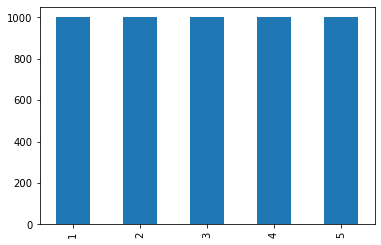

In [17]:


lr=1e-6
N=1000

n_class=5
n_epoch=100
batch_size=32
tsne = TSNE()


Atomic_size=[100,200,500,1000]


Train_encoded=[]
Test_encoded=[]
X_tSNE_encoded_list=[]
X_tSNE_list=[]
X_tSNE_test_encoded_list=[]
X_tSNE_test_list=[]
Y=[]
Y_test=[]




'''
preprocess and store the data for each atomic size respectively, learn 

'''

for k in range(len(Atomic_size)):
    

    
    preprocess_data(list_of_input_paths,output_path,Atomic_size[k],N,counting_method='truncated_sequence')
    df = pd.read_table('data/data.txt')
    df['class'].value_counts().sort_index().plot.bar()

    X_train,y_train,X_test,y_test=one_hot_split(df,Atomic_size[k],test_size=0.25)
    
    X_tSNE=tsne.fit_transform(X_train[:, :, 0])
    X_tSNE_list.append(X_tSNE)
    X_tSNE_test=tsne.fit_transform(X_test[:, :, 0])
    X_tSNE_test_list.append(X_tSNE_test)




    encoder_decoder = create_model(3,X_train,lr,activation='tanh')


    
    
    

    checkpoint_path = "training/cp-actual-{L=%i}.ckpt"%Atomic_size[k]
    checkpoint_dir = os.path.dirname(checkpoint_path)
    #EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
    EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss')
    #latest = tf.train.latest_checkpoint(checkpoint_dir)
    #encoder_decoder.load_weights(latest)
    
    encoder_decoder.load_weights(checkpoint_path)
    encoder_decoder_history=encoder_decoder.fit(X_train, X_train, batch_size,steps_per_epoch= 1, epochs=n_epoch,  callbacks=[EarlyStopping], verbose=0)
    encoder_decoder.save_weights(checkpoint_path)

    print(encoder_decoder_history.history['loss'])
    encoder=Model(inputs=encoder_decoder.inputs, outputs=encoder_decoder.layers[2].output)



    train_encoded = encoder.predict(X_train)
    Train_encoded.append(train_encoded)
    validation_encoded = encoder.predict(X_test)
    Test_encoded.append(validation_encoded)
    

    y=[np.argmax(i) for i in y_train]
    Y.append(y)
    y_test=[np.argmax(i) for i in y_test]
    Y_test.append(y_test)
    
    

    X_tSNE_encoded=tsne.fit_transform(train_encoded)
    X_tSNE_encoded_list.append(X_tSNE_encoded)
    X_tSNE_test_encoded=tsne.fit_transform(validation_encoded)
    X_tSNE_test_encoded_list.append(X_tSNE_test_encoded)
    

   

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


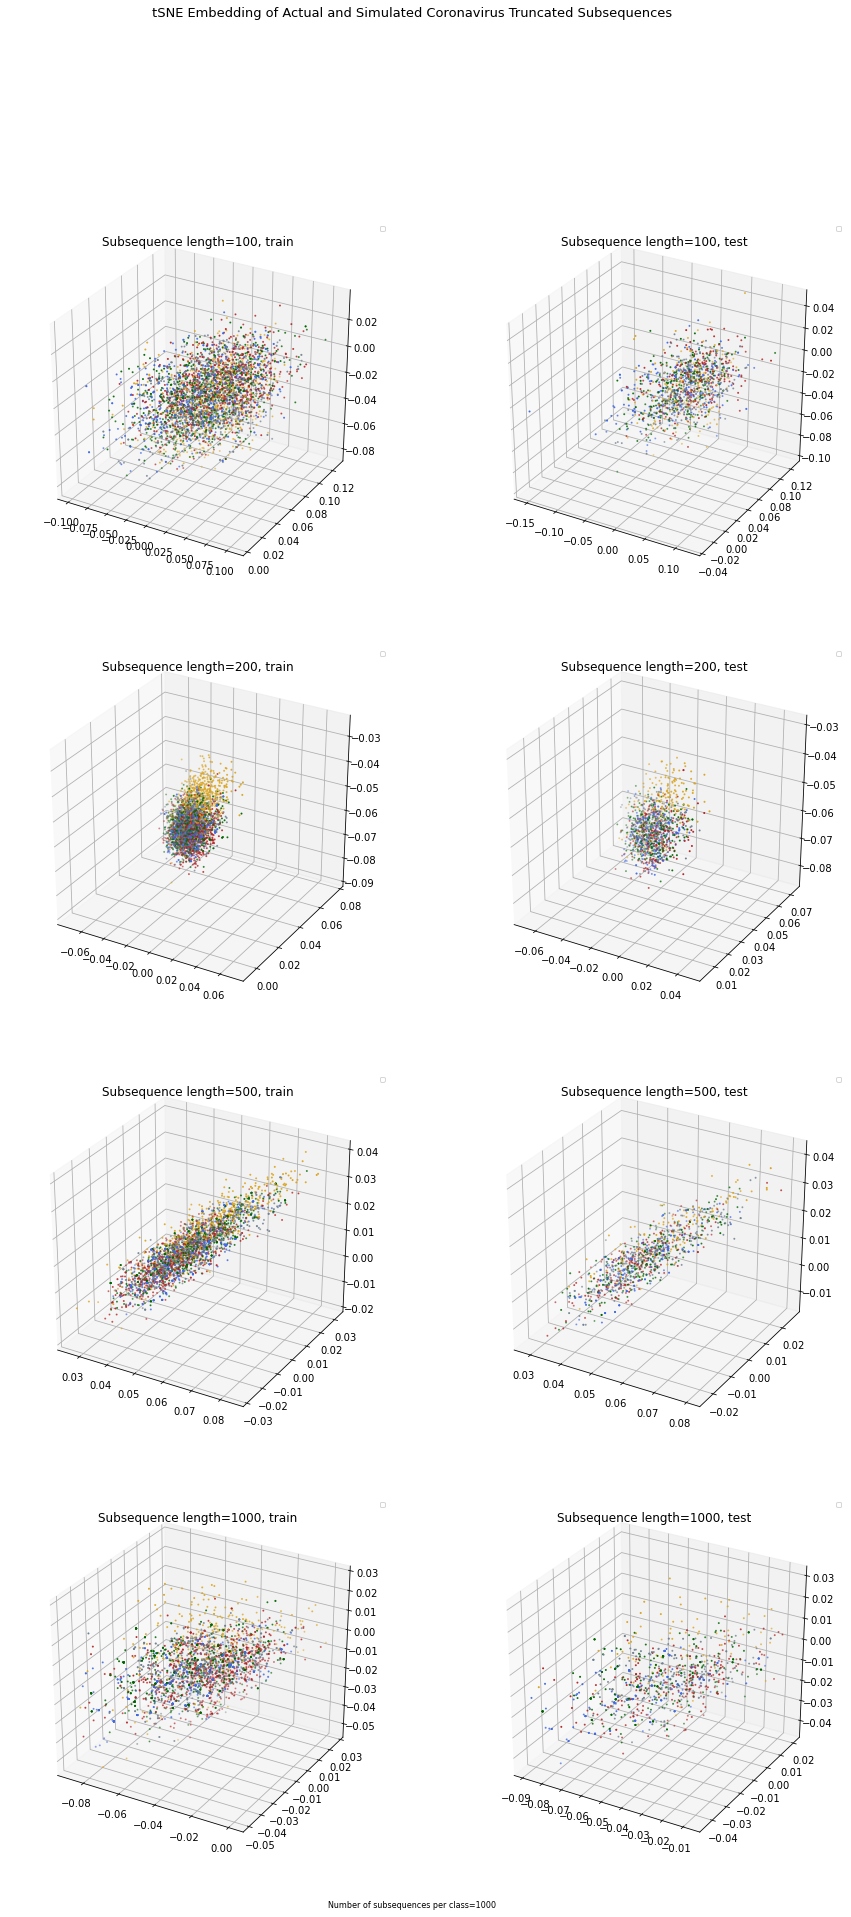

In [18]:


plt.figure(figsize = (15, 30))


for k in range(len(Atomic_size)):
    
    y=Y[k]
    y_test=Y_test[k]
    train_encoded=Train_encoded[k]
    test_encoded=Test_encoded[k]

    
    
    
    ax1 = plt.subplot(len(Atomic_size),2,k*2+1, projection='3d')
    c=[color_dict[y2label[i]] for i in y] 
   

    
    
    
    


    #sns.scatterplot(train_encoded[:,0], train_encoded[:,1], hue=[y2label[i] for i in y], legend='full', palette=color_dict)
    
    ax1.scatter(train_encoded[:,0], train_encoded[:,1], train_encoded[:,2],c=c,s=1)
    
    ax1.set_title('Subsequence length=%i, train'%Atomic_size[k])
    ax1.legend(fontsize=6)

# ax = fig.add_subplot(111, projection='3d') # Method 2





    ax2 = plt.subplot(len(Atomic_size),2,k*2+2, projection='3d')
    c=[color_dict[y2label[i]] for i in y_test]


    ax2.scatter(test_encoded[:,0], test_encoded[:,1], test_encoded[:,2],c=c,s=1)
    

    ax2.set_title('Subsequence length=%i, test'%Atomic_size[k])
    ax2.legend(fontsize=6)





plt.figtext(0.5,0.1,'Number of subsequences per class=%i'%(N), ha="center", fontsize=8)


plt.suptitle("tSNE Embedding of Actual and Simulated Coronavirus Truncated Subsequences", ha="center",fontsize=13)





plt.savefig("figures/Atomic_test_size%s_Nsample%i"%(str(Atomic_size),N))






In [19]:
for k in range(len(Atomic_size)):
    y=Y[k]
    print(np.shape(Train_encoded[k]),np.shape(y),np.shape(X_tSNE_encoded_list[k]))

(3687, 3) (3687,) (3687, 2)
(3622, 3) (3622,) (3622, 2)
(3422, 3) (3422,) (3422, 2)
(3195, 3) (3195,) (3195, 2)


In [20]:
reducer = umap.UMAP()

k=1

scaled_encoded = StandardScaler().fit_transform(Train_encoded[k])

umap_encoded = reducer.fit_transform(scaled_encoded)
print(umap_encoded.shape)

(3622, 2)


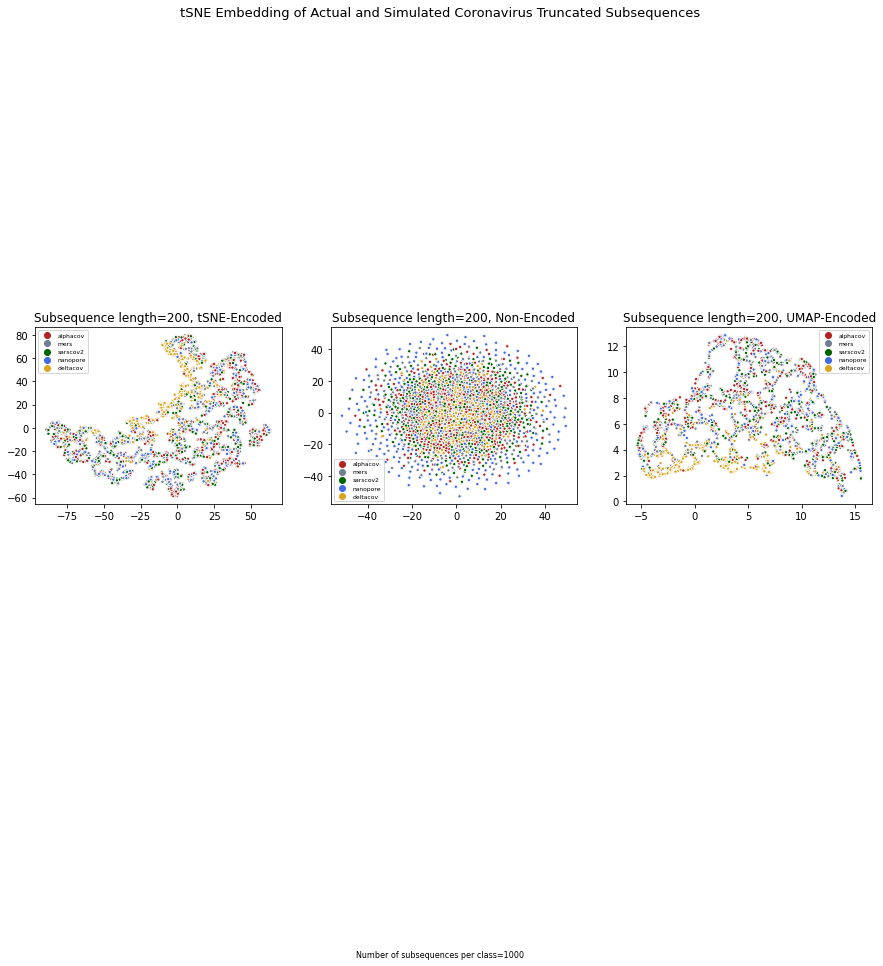

In [21]:


    
plt.figure(figsize = (15, 15))


#for k in range(len(Atomic_size)):
k=1

y=Y[k]
X_tSNE_encoded=X_tSNE_encoded_list[k]
X_tSNE=X_tSNE_list[k]


ax1 = plt.subplot(len(Atomic_size),3,k*3+1)

sns.scatterplot(X_tSNE_encoded[:,0], X_tSNE_encoded[:,1],s=10, hue=[y2label[i] for i in y], legend='full', palette=color_dict)

ax1.set_title('Subsequence length=%i, tSNE-Encoded'%Atomic_size[k])
ax1.legend(fontsize=6)




ax2 = plt.subplot(len(Atomic_size),3,k*3+2)

sns.scatterplot(X_tSNE[:,0],X_tSNE[:,1], hue=[y2label[i] for i in y],s=10, legend='full', palette=color_dict)
ax2.set_title('Subsequence length=%i, Non-Encoded'%Atomic_size[k])
ax2.legend(fontsize=6)


ax3 = plt.subplot(len(Atomic_size),3,k*3+3)

sns.scatterplot(umap_encoded[:,0],umap_encoded[:,1], hue=[y2label[i] for i in y],s=10, legend='full', palette=color_dict)
ax3.set_title('Subsequence length=%i, UMAP-Encoded'%Atomic_size[k])
ax3.legend(fontsize=6)





plt.suptitle("tSNE Embedding of Actual and Simulated Coronavirus Truncated Subsequences",fontsize=13)


    


plt.figtext(0.5,0.1,'Number of subsequences per class=%i'%(N), ha="center", fontsize=8)




plt.savefig("figures/Atomic_size%s_Nsample%i"%(str(Atomic_size),N))





# Lets try a deeper network

{'A', 'T', 'K', 'G', 'C'} 5


/Users/nuozhouwang/Desktop/VAE genome/functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (4916, 105, 5)
Example sequence
-----------------------
DNA Sequence #1:
 ATKGCATTAA ... GCTGTCACTC
One hot encoding of Sequence #1:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]]
Labels:
 [[1 1 1 ... 5 5 5]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(3687, 105, 5) (3687, 5)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_59 (LSTM)               (None, 105, 105)          46620     
_________________________________________________________________
lstm_60 (LSTM)               (None, 105, 64)           43520     
_________________________________________________________________
lstm_61 (LSTM)               (None, 105, 32)           12416     
______________________________________

/Users/nuozhouwang/Desktop/VAE genome/functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (4830, 210, 10)
Example sequence
-----------------------
DNA Sequence #1:
 YRWATSKGCM ... TGCTTACGGT
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
Labels:
 [[1 1 1 ... 5 5 5]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(3622, 210, 10) (3622, 5)
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_66 (LSTM)               (None, 210, 210)          185640    
_________________________________________________________________
lstm_67 (LSTM)               (None, 210, 64)           70400     
_________________________________________________________________
lstm_68 (LSTM)               (None, 210, 32)           12416     
______

/Users/nuozhouwang/Desktop/VAE genome/functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (4563, 511, 11)
Example sequence
-----------------------
DNA Sequence #1:
 YRWNATSKGC ... GCTCGAACTG
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
Labels:
 [[1 1 1 ... 5 5 5]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(3422, 511, 11) (3422, 5)
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_73 (LSTM)               (None, 511, 511)          1069012   
_________________________________________________________________
lstm_74 (LSTM)               (None, 511, 64)           147456    
_________________________________________________________________
lstm_75 (LSTM)               (None, 511, 32)           12416     
______

/Users/nuozhouwang/Desktop/VAE genome/functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (4261, 1011, 11)
Example sequence
-----------------------
DNA Sequence #1:
 YRWNATSKGC ... GGAACGTTCT
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
Labels:
 [[1 1 1 ... 5 5 5]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(3195, 1011, 11) (3195, 5)
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_80 (LSTM)               (None, 1011, 1011)        4137012   
_________________________________________________________________
lstm_81 (LSTM)               (None, 1011, 64)          275456    
_________________________________________________________________
lstm_82 (LSTM)               (None, 1011, 32)          12416     
____

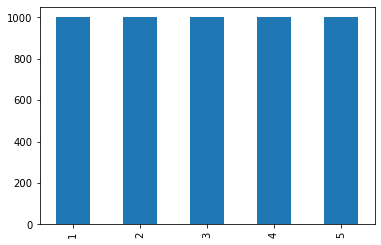

In [37]:


lr=1e-6
N=1000

n_class=5
n_epoch=100
batch_size=32
tsne = TSNE()

decoder_level=3


Atomic_size=[100,200,500,1000]



Train_encoded=[]
Test_encoded=[]
X_tSNE_encoded_list=[]
X_tSNE_list=[]
X_tSNE_test_encoded_list=[]
X_tSNE_test_list=[]
X_train_list=[]
Y=[]
Y_test=[]



'''
preprocess and store the data for each atomic size respectively, learn 

'''

for k in range(len(Atomic_size)):
    

    
    preprocess_data(list_of_input_paths,output_path,Atomic_size[k],N,counting_method='truncated_sequence')
    df = pd.read_table('data/data.txt')
    df['class'].value_counts().sort_index().plot.bar()

    X_train,y_train,X_test,y_test=one_hot_split(df,Atomic_size[k],test_size=0.25)
    
    X_tSNE=tsne.fit_transform(X_train[:, :, 0])
    X_tSNE_list.append(X_tSNE)
    X_tSNE_test=tsne.fit_transform(X_test[:, :, 0])
    X_tSNE_test_list.append(X_tSNE_test)
    X_train_list.append(X_train)




    encoder_decoder = deeper_AE(3,X_train,lr,activation='tanh')


    
    
    

    checkpoint_path = "training/cp-actual-{L=%i}.ckpt"%Atomic_size[k]
    checkpoint_dir = os.path.dirname(checkpoint_path)
    #EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
    EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss')
    #latest = tf.train.latest_checkpoint(checkpoint_dir)
    #encoder_decoder.load_weights(latest)
    
    #encoder_decoder.load_weights(checkpoint_path)
    encoder_decoder_history=encoder_decoder.fit(X_train, X_train, batch_size,steps_per_epoch= 1, epochs=n_epoch,  callbacks=[EarlyStopping], verbose=0)
    encoder_decoder.save_weights(checkpoint_path)

    print(encoder_decoder_history.history['loss'])
    encoder=Model(inputs=encoder_decoder.inputs, outputs=encoder_decoder.layers[decoder_level].output)



    train_encoded = encoder.predict(X_train)
    Train_encoded.append(train_encoded)
    validation_encoded = encoder.predict(X_test)
    Test_encoded.append(validation_encoded)
    

    y=[np.argmax(i) for i in y_train]
    Y.append(y)
    y_test=[np.argmax(i) for i in y_test]
    Y_test.append(y_test)
    
    

    X_tSNE_encoded=tsne.fit_transform(train_encoded)
    X_tSNE_encoded_list.append(X_tSNE_encoded)
    X_tSNE_test_encoded=tsne.fit_transform(validation_encoded)
    X_tSNE_test_encoded_list.append(X_tSNE_test_encoded)
    

   

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


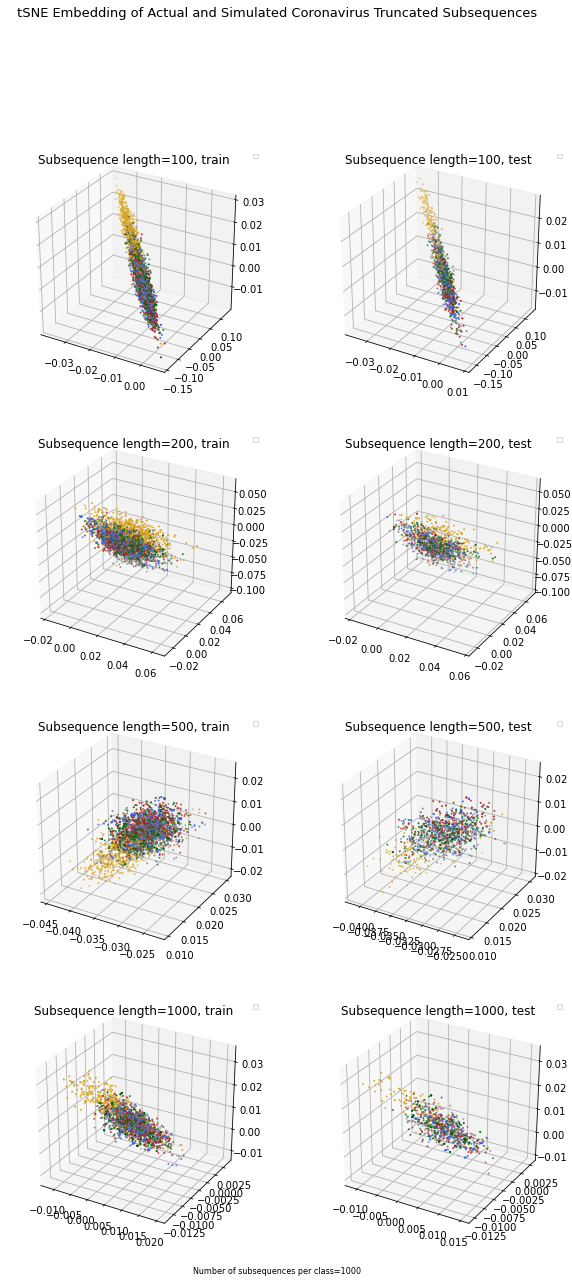

In [39]:


plt.figure(figsize = (10, 20))


for k in range(len(Atomic_size)):
    
    y=Y[k]
    y_test=Y_test[k]
    train_encoded=Train_encoded[k]
    test_encoded=Test_encoded[k]

    
    
    
    ax1 = plt.subplot(len(Atomic_size),2,k*2+1, projection='3d')
    c=[color_dict[y2label[i]] for i in y] 
   

    
    
    
    


    #sns.scatterplot(train_encoded[:,0], train_encoded[:,1], hue=[y2label[i] for i in y], legend='full', palette=color_dict)
    
    ax1.scatter(train_encoded[:,0], train_encoded[:,1], train_encoded[:,2],c=c,s=1)
    
    ax1.set_title('Subsequence length=%i, train'%Atomic_size[k])
    ax1.legend(fontsize=6)

# ax = fig.add_subplot(111, projection='3d') # Method 2





    ax2 = plt.subplot(len(Atomic_size),2,k*2+2, projection='3d')
    c=[color_dict[y2label[i]] for i in y_test]


    ax2.scatter(test_encoded[:,0], test_encoded[:,1], test_encoded[:,2],c=c,s=1)
    

    ax2.set_title('Subsequence length=%i, test'%Atomic_size[k])
    ax2.legend(fontsize=6)





plt.figtext(0.5,0.1,'Number of subsequences per class=%i'%(N), ha="center", fontsize=8)


plt.suptitle("tSNE Embedding of Actual and Simulated Coronavirus Truncated Subsequences", ha="center",fontsize=13)





plt.savefig("figures/Atomic_test_size%s_Nsample%i"%(str(Atomic_size),N))







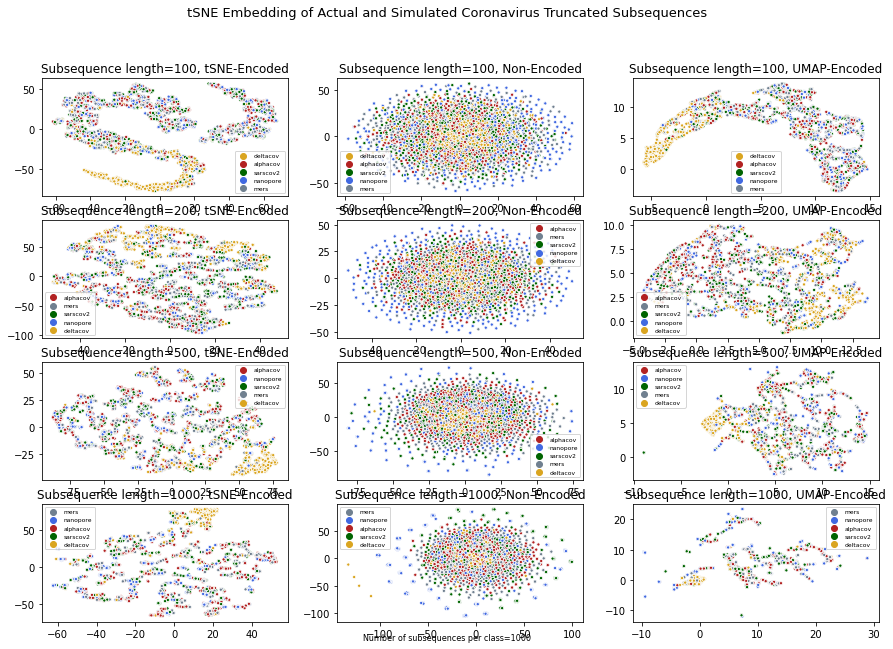

In [40]:

    
plt.figure(figsize = (15, 10))


for k in range(len(Atomic_size)):

    y=Y[k]
    X_tSNE_encoded=X_tSNE_encoded_list[k]
    X_tSNE=X_tSNE_list[k]
    scaled_encoded = StandardScaler().fit_transform(Train_encoded[k])
    umap_encoded = reducer.fit_transform(scaled_encoded)




    ax1 = plt.subplot(len(Atomic_size),3,k*3+1)

    sns.scatterplot(X_tSNE_encoded[:,0], X_tSNE_encoded[:,1],s=10, hue=[y2label[i] for i in y], legend='full', palette=color_dict)

    ax1.set_title('Subsequence length=%i, tSNE-Encoded'%Atomic_size[k])
    ax1.legend(fontsize=6)




    ax2 = plt.subplot(len(Atomic_size),3,k*3+2)

    sns.scatterplot(X_tSNE[:,0],X_tSNE[:,1], hue=[y2label[i] for i in y],s=10, legend='full', palette=color_dict)
    ax2.set_title('Subsequence length=%i, Non-Encoded'%Atomic_size[k])
    ax2.legend(fontsize=6)

    ax3 = plt.subplot(len(Atomic_size),3,k*3+3)

    sns.scatterplot(umap_encoded[:,0],umap_encoded[:,1], hue=[y2label[i] for i in y],s=10, legend='full', palette=color_dict)
    ax3.set_title('Subsequence length=%i, UMAP-Encoded'%Atomic_size[k])
    ax3.legend(fontsize=6)







plt.suptitle("tSNE Embedding of Actual and Simulated Coronavirus Truncated Subsequences",fontsize=13)


    


plt.figtext(0.5,0.1,'Number of subsequences per class=%i'%(N), ha="center", fontsize=8)




plt.savefig("figures/Atomic_size%s_Nsample%i"%(str(Atomic_size),N))






# Try deeper4

{'A', 'G', 'K', 'C', 'T'} 5


/Users/nuozhouwang/Desktop/VAE genome/functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (4916, 105, 5)
Example sequence
-----------------------
DNA Sequence #1:
 AGKCTATTAA ... GCTGTCACTC
One hot encoding of Sequence #1:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Labels:
 [[1 1 1 ... 5 5 5]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(3687, 105, 5) (3687, 5)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 105, 105)          46620     
_________________________________________________________________
lstm_28 (LSTM)               (None, 105, 128)          119808    
_________________________________________________________________
lstm_29 (LSTM)               (None, 105, 64)           49408     
_______________________________________

/Users/nuozhouwang/Desktop/VAE genome/functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (4830, 210, 10)
Example sequence
-----------------------
DNA Sequence #1:
 YMAWSGKCRT ... TGCTTACGGT
One hot encoding of Sequence #1:
 [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
Labels:
 [[1 1 1 ... 5 5 5]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(3622, 210, 10) (3622, 5)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 210, 210)          185640    
_________________________________________________________________
lstm_37 (LSTM)               (None, 210, 128)          173568    
_________________________________________________________________
lstm_38 (LSTM)               (None, 210, 64)           49408     
_______

/Users/nuozhouwang/Desktop/VAE genome/functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (4563, 511, 11)
Example sequence
-----------------------
DNA Sequence #1:
 YMNAWSGKCR ... GCTCGAACTG
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
Labels:
 [[1 1 1 ... 5 5 5]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(3422, 511, 11) (3422, 5)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_45 (LSTM)               (None, 511, 511)          1069012   
_________________________________________________________________
lstm_46 (LSTM)               (None, 511, 128)          327680    
_________________________________________________________________
lstm_47 (LSTM)               (None, 511, 64)           49408     
_______

/Users/nuozhouwang/Desktop/VAE genome/functions.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (4261, 1011, 11)
Example sequence
-----------------------
DNA Sequence #1:
 YMNAWSGKCR ... GGAACGTTCT
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
Labels:
 [[1 1 1 ... 5 5 5]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(3195, 1011, 11) (3195, 5)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 1011, 1011)        4137012   
_________________________________________________________________
lstm_55 (LSTM)               (None, 1011, 128)         583680    
_________________________________________________________________
lstm_56 (LSTM)               (None, 1011, 64)          49408     
_____

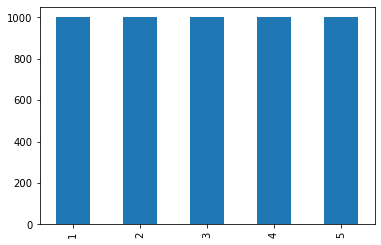

In [26]:

lr=1e-6
N=1000

n_class=5
n_epoch=100
batch_size=32
tsne = TSNE()

encoder_level=4






Atomic_size=[100,200,500,1000]
bottleneck_dim=3

X_train_list,X_test_list,Y_train,Y_test,Train_encoded,\
Test_encoded,X_tSNE_encoded_list,X_tSNE_list,X_tSNE_test_encoded_list,\
X_tSNE_test_list,Umap_encoded=Encoding(list_of_input_paths,output_path,colour,labels,Atomic_size,N,n_class,\
lr,n_epoch,batch_size,encoder_level,bottleneck_dim,deeper_AE4,LOAD='False')
    
print(len(Atomic_size),np.shape(Y_train),np.shape(Train_encoded))



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


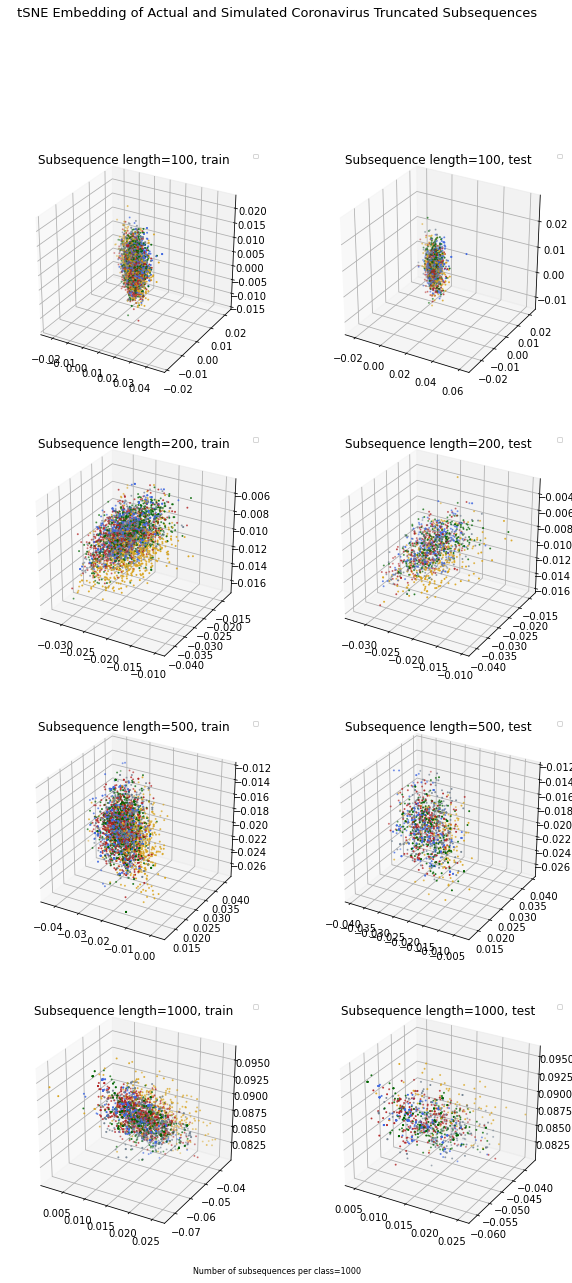

In [27]:

plt.figure(figsize = (10, 20))

color_dict = dict(zip(labels,colour))
y2label=dict(zip(list(range(11)),labels))




for k in range(len(Atomic_size)):
    
    y=Y_train[k]
    y_test=Y_test[k]
    train_encoded=Train_encoded[k]
    test_encoded=Test_encoded[k]

    
    
    
    ax1 = plt.subplot(len(Atomic_size),2,k*2+1, projection='3d')
    c=[color_dict[y2label[i]] for i in y] 
   

    
    
    
    


    #sns.scatterplot(train_encoded[:,0], train_encoded[:,1], hue=[y2label[i] for i in y], legend='full', palette=color_dict)
    
    ax1.scatter(train_encoded[:,0], train_encoded[:,1], train_encoded[:,2],c=c,s=1)
    
    ax1.set_title('Subsequence length=%i, train'%Atomic_size[k])
    ax1.legend(fontsize=6)

# ax = fig.add_subplot(111, projection='3d') # Method 2





    ax2 = plt.subplot(len(Atomic_size),2,k*2+2, projection='3d')
    c=[color_dict[y2label[i]] for i in y_test]


    ax2.scatter(test_encoded[:,0], test_encoded[:,1], test_encoded[:,2],c=c,s=1)
    

    ax2.set_title('Subsequence length=%i, test'%Atomic_size[k])
    ax2.legend(fontsize=6)





plt.figtext(0.5,0.1,'Number of subsequences per class=%i'%(N), ha="center", fontsize=8)


plt.suptitle("tSNE Embedding of Actual and Simulated Coronavirus Truncated Subsequences", ha="center",fontsize=13)





plt.savefig("figures/Atomic_test_size%s_Nsample%i"%(str(Atomic_size),N))





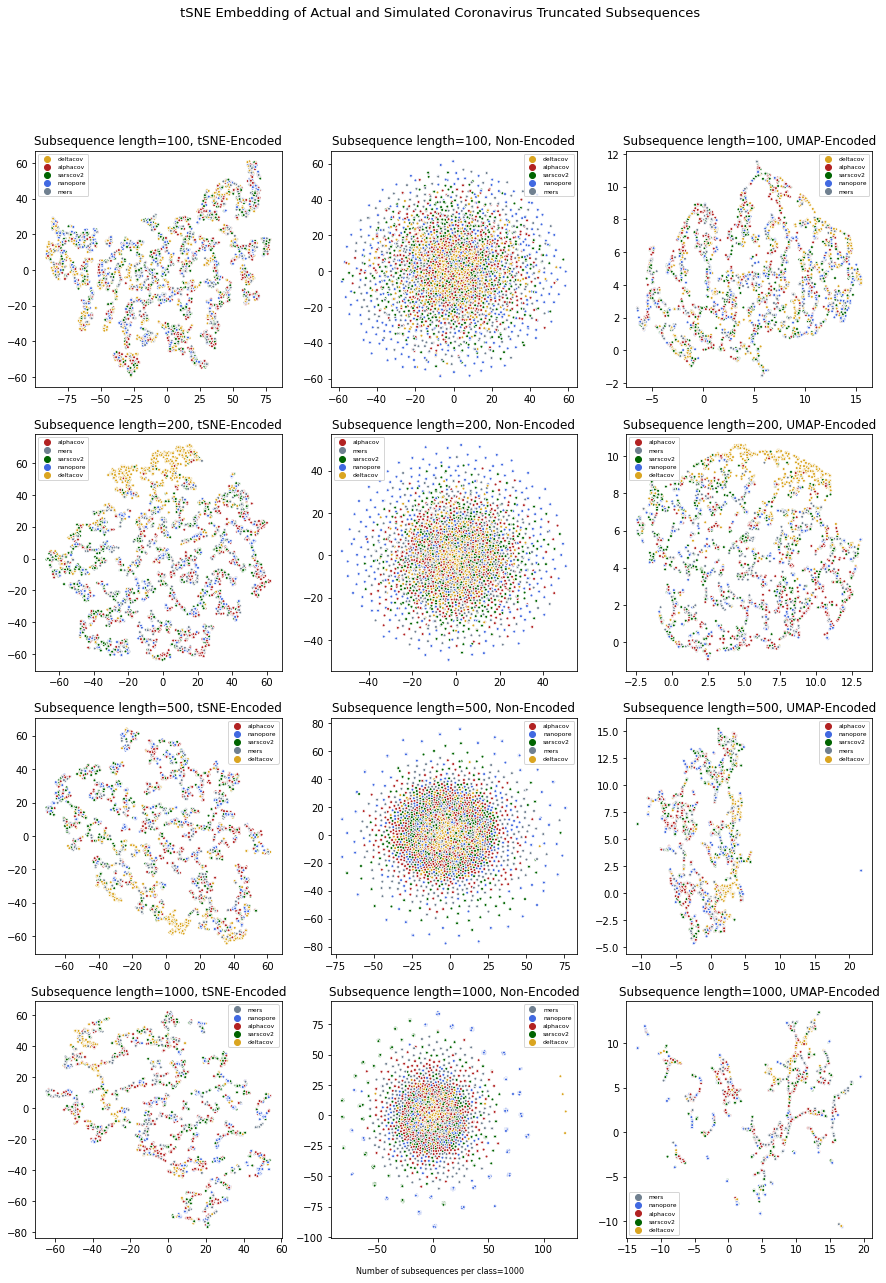

In [31]:
reducer = umap.UMAP()


plt.figure(figsize = (15, 20))

dot_size=8
for k in range(len(Atomic_size)):

    y=Y_train[k]
    X_tSNE_encoded=X_tSNE_encoded_list[k]
    X_tSNE=X_tSNE_list[k]
    scaled_encoded = StandardScaler().fit_transform(Train_encoded[k])
    umap_encoded = reducer.fit_transform(scaled_encoded)




    ax1 = plt.subplot(len(Atomic_size),3,k*3+1)

    sns.scatterplot(X_tSNE_encoded[:,0], X_tSNE_encoded[:,1],s=dot_size, hue=[y2label[i] for i in y], legend='full', palette=color_dict)

    ax1.set_title('Subsequence length=%i, tSNE-Encoded'%Atomic_size[k])
    ax1.legend(fontsize=6)




    ax2 = plt.subplot(len(Atomic_size),3,k*3+2)

    sns.scatterplot(X_tSNE[:,0],X_tSNE[:,1],s=dot_size, hue=[y2label[i] for i in y], legend='full', palette=color_dict)
    ax2.set_title('Subsequence length=%i, Non-Encoded'%Atomic_size[k])
    ax2.legend(fontsize=6)

    ax3 = plt.subplot(len(Atomic_size),3,k*3+3)

    sns.scatterplot(umap_encoded[:,0],umap_encoded[:,1],s=dot_size, hue=[y2label[i] for i in y], legend='full', palette=color_dict)
    ax3.set_title('Subsequence length=%i, UMAP-Encoded'%Atomic_size[k])
    ax3.legend(fontsize=6)







plt.suptitle("tSNE Embedding of Actual and Simulated Coronavirus Truncated Subsequences",fontsize=13)


    


plt.figtext(0.5,0.1,'Number of subsequences per class=%i'%(N), ha="center", fontsize=8)




plt.savefig("figures/Atomic_size%s_Nsample%i"%(str(Atomic_size),N))





In [ ]:
'''
Binary classification

'''



In [ ]:






list_of_input_paths=["data/sarscov2.fna",
                     "data/alphacov.fna",
"data/deltacov.fna","data/JAMMSM0917_nanopore2500.fa","data/mers.fna"]

output_path = "data/data.txt"



colour=['royalblue','darkgreen','firebrick','goldenrod','slategrey']
labels=['nanopore','sarscov2','alphacov','deltacov','mers']


color_dict = dict(zip(labels,colour))
y2label=dict(zip(list(range(11)),labels))








In [ ]:

lr=1e-6
N=1000

n_class=5
n_epoch=100
batch_size=32
tsne = TSNE()

encoder_level=4






Atomic_size=[100,200,500,1000]
bottleneck_dim=3

X_train_list,X_test_list,Y_train,Y_test,Train_encoded,\
Test_encoded,X_tSNE_encoded_list,X_tSNE_list,X_tSNE_test_encoded_list,\
X_tSNE_test_list,Umap_encoded=Encoding(list_of_input_paths,output_path,colour,labels,Atomic_size,N,n_class,\
lr,n_epoch,batch_size,encoder_level,bottleneck_dim,deeper_AE4,LOAD='False')
    
print(len(Atomic_size),np.shape(Y_train),np.shape(Train_encoded))




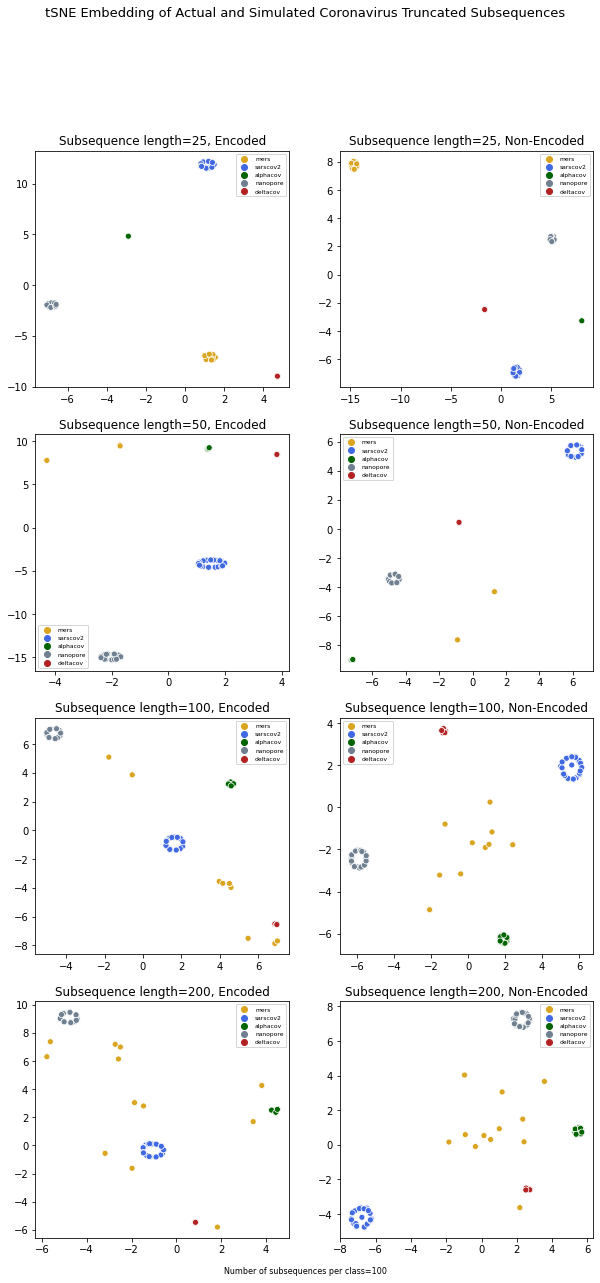

In [18]:


    
plt.figure(figsize = (10, 20))




for k in range(len(Atomic_size)):
    
    y=Y_test[k]
    X_tSNE_encoded=X_tSNE_test_encoded_list[k]
    X_tSNE=X_tSNE_test_list[k]
    

    ax1 = plt.subplot(len(Atomic_size),2,k*2+1)

    sns.scatterplot(X_tSNE_encoded[:,0], X_tSNE_encoded[:,1], hue=[y2label[i] for i in y], legend='full', palette=color_dict)

    ax1.set_title('Subsequence length=%i, Encoded'%Atomic_size[k])
    ax1.legend(fontsize=6)




    ax2 = plt.subplot(len(Atomic_size),2,k*2+2)

    sns.scatterplot(X_tSNE[:,0],X_tSNE[:,1], hue=[y2label[i] for i in y], legend='full', palette=color_dict)
    ax2.set_title('Subsequence length=%i, Non-Encoded'%Atomic_size[k])
    ax2.legend(fontsize=6)





plt.figtext(0.5,0.1,'Number of subsequences per class=%i'%(N), ha="center", fontsize=8)


plt.suptitle("tSNE Embedding of Actual and Simulated Coronavirus Truncated Subsequences", ha="center",fontsize=13)





plt.savefig("figures/Atomic_test_size%s_Nsample%i"%(str(Atomic_size),N))





In [28]:
A = Sequential()
serie_size=X_train.shape[1]
n_features=X_train.shape[2]
A.add(LSTM(serie_size, activation='tanh', input_shape=(serie_size, n_features), return_sequences=True))
#encoder_decoder.add(LSTM(64, activation=activation, return_sequences=True))
A.add(LSTM(32, activation='tanh', return_sequences=True))
A.add(LSTM(n_class, activation='tanh'))
A.add(RepeatVector(serie_size))
A.add(LSTM(serie_size, activation='tanh', return_sequences=True))
A.add(LSTM(32, activation='tanh', return_sequences=True))
#encoder_decoder.add(LSTM(64, activation=activation, return_sequences=True))
A.add(TimeDistributed(Dense(4)))
A.summary()


Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_193 (LSTM)              (None, 204, 204)          170544    
_________________________________________________________________
lstm_194 (LSTM)              (None, 204, 32)           30336     
_________________________________________________________________
lstm_195 (LSTM)              (None, 11)                1936      
_________________________________________________________________
repeat_vector_32 (RepeatVect (None, 204, 11)           0         
_________________________________________________________________
lstm_196 (LSTM)              (None, 204, 204)          176256    
_________________________________________________________________
lstm_197 (LSTM)              (None, 204, 32)           30336     
_________________________________________________________________
time_distributed_31 (TimeDis (None, 204, 4)          

# try to solve a binary problem, 2 types of genome

In [8]:


list_of_input_paths=["data/sarscov2.fna",
                     "data/deltacov.fna"]




output_path = "data/data.txt"



colour=['royalblue','goldenrod']
labels=['sarscov2','deltacov']


color_dict = dict(zip(labels,colour))
y2label=dict(zip(list(range(len(labels))),labels))




In [ ]:
lr=1e-6
N=1000

n_class=2
n_epoch=100
batch_size=32

encoder_level=4
bottleneck_dim=100




#Atomic_size=[100,200,500,1000]
Atomic_size=[2000]
X_train_list,X_test_list,Y_train,Y_test,Train_encoded,\
Test_encoded,X_tSNE_encoded_list,X_tSNE_list,X_tSNE_test_encoded_list,\
X_tSNE_test_list,Umap_encoded=Encoding(list_of_input_paths,output_path,colour,labels,Atomic_size,N,n_class,\
lr,n_epoch,batch_size,encoder_level,bottleneck_dim,deeper_AE4,binary='True',LOAD='False')
    
print(len(Atomic_size),np.shape(Y_train),np.shape(Train_encoded))




{'K', 'C', 'Y', 'T', 'R', 'S', 'N', 'M', 'W', 'A', 'G'} 11


/Users/wan/Desktop/VAE genome/functions.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['sequence'][i]=''.join(base)+dataframe['sequence'][i]


Input Shape (1862, 2011, 11)
Example sequence
-----------------------
DNA Sequence #1:
 KCYTRSNMWA ... TATTCACTGA
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
Labels:
 [[1 1 1 ... 2 2 2]]
One-hot encoded labels:
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
(1396, 2011, 11) (1396, 2)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2011, 2011)        16273012  
_________________________________________________________________
lstm_1 (LSTM)                (None, 2011, 128)         1095680   
_________________________________________________________________
lstm_2 (LSTM)                (None, 2011, 64)          49408     
_________________________________________________________________
lstm_3 (LSTM)   

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/pyt

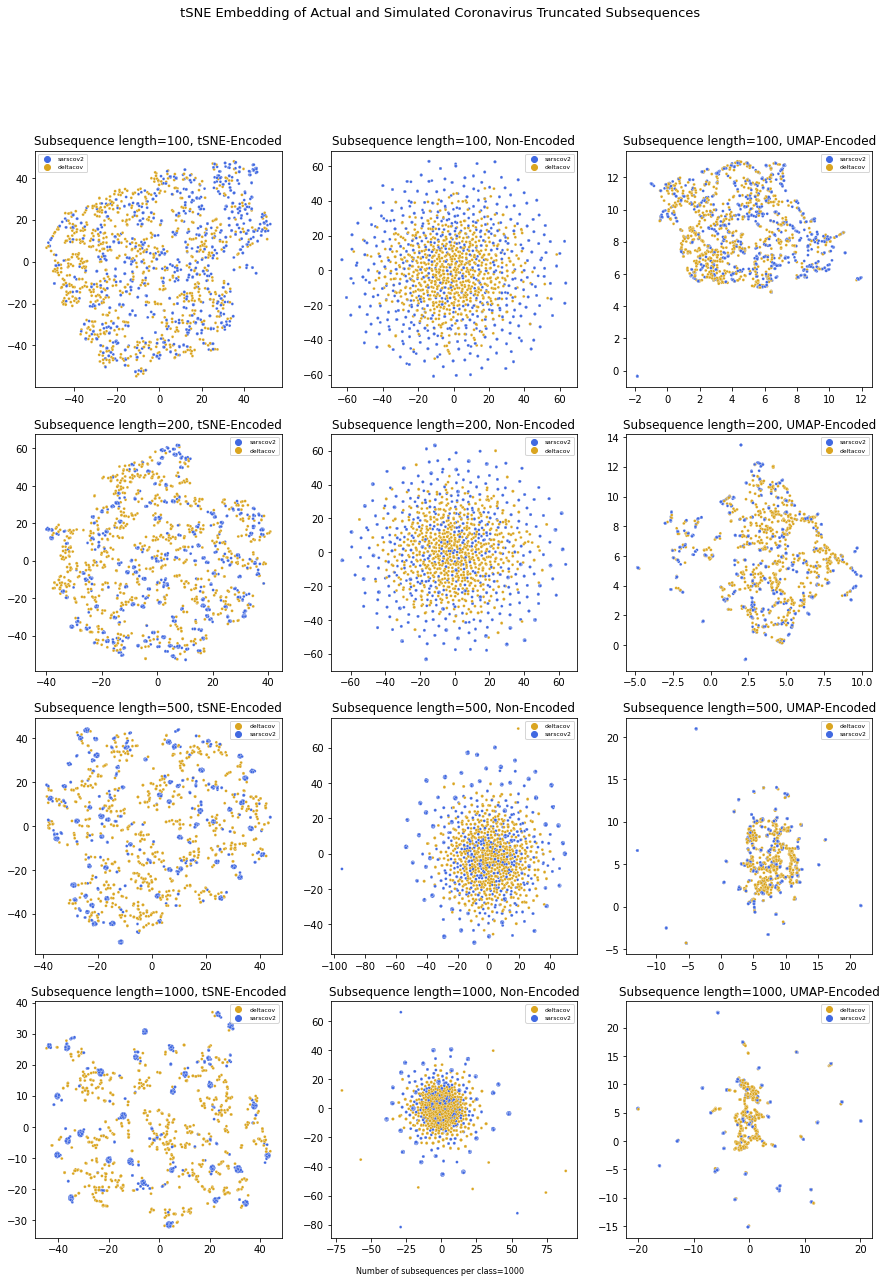

In [52]:
reducer = umap.UMAP()


plt.figure(figsize = (15, 20))

dot_size=8
for k in range(len(Atomic_size)):

    y=Y_train[k]
    X_tSNE_encoded=X_tSNE_encoded_list[k]
    X_tSNE=X_tSNE_list[k]
    scaled_encoded = StandardScaler().fit_transform(Train_encoded[k])
    umap_encoded = reducer.fit_transform(scaled_encoded)




    ax1 = plt.subplot(len(Atomic_size),3,k*3+1)

    sns.scatterplot(X_tSNE_encoded[:,0], X_tSNE_encoded[:,1],s=dot_size, hue=[y2label[i] for i in y], legend='full', palette=color_dict)

    ax1.set_title('Subsequence length=%i, tSNE-Encoded'%Atomic_size[k])
    ax1.legend(fontsize=6)




    ax2 = plt.subplot(len(Atomic_size),3,k*3+2)

    sns.scatterplot(X_tSNE[:,0],X_tSNE[:,1],s=dot_size, hue=[y2label[i] for i in y], legend='full', palette=color_dict)
    ax2.set_title('Subsequence length=%i, Non-Encoded'%Atomic_size[k])
    ax2.legend(fontsize=6)

    ax3 = plt.subplot(len(Atomic_size),3,k*3+3)

    sns.scatterplot(umap_encoded[:,0],umap_encoded[:,1],s=dot_size, hue=[y2label[i] for i in y], legend='full', palette=color_dict)
    ax3.set_title('Subsequence length=%i, UMAP-Encoded'%Atomic_size[k])
    ax3.legend(fontsize=6)







plt.suptitle("tSNE Embedding of Actual and Simulated Coronavirus Truncated Subsequences",fontsize=13)


    


plt.figtext(0.5,0.1,'Number of subsequences per class=%i'%(N), ha="center", fontsize=8)




plt.savefig("figures/Atomic_size%s_Nsample%i"%(str(Atomic_size),N))






<AxesSubplot:>

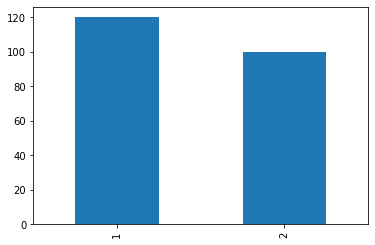

In [26]:



df = pd.read_table('data/data.txt')
df['class'].value_counts().sort_index().plot.bar()


In [39]:
print(len(X_tSNE),len(X_tSNE_encoded),len(umap_encoded))

6312 6312 6312


# Use only the nanopore data

In [8]:


list_of_input_paths=["data/JAMMSM0917_nanopore2500.fa","data/sarscov2.fna"]




output_path = "data/data.txt"



colour=['royalblue']
labels=['nanopore']


color_dict = dict(zip(labels,colour))
y2label=dict(zip(list(range(len(labels))),labels))





In [ ]:
lr=1e-6
N=1000

n_class=2
n_epoch=100
batch_size=32

encoder_level=4
bottleneck_dim=100




#Atomic_size=[100,200,500,1000]
Atomic_size=[20000]
X_train_list,X_test_list,Y_train,Y_test,Train_encoded,\
Test_encoded,X_tSNE_encoded_list,X_tSNE_list,X_tSNE_test_encoded_list,\
X_tSNE_test_list,Umap_encoded=Encoding(list_of_input_paths,output_path,colour,labels,Atomic_size,N,n_class,\
lr,n_epoch,batch_size,encoder_level,bottleneck_dim,deeper_AE4,binary='True',LOAD='False')
    
print(len(Atomic_size),np.shape(Y_train),np.shape(Train_encoded))





{'T', 'K', 'G', 'N', 'Y', 'H', 'R', 'V', 'W', 'M', 'D', 'C', 'B', 'A', 'S'} 15
Input Shape (500, 20015, 15)
Example sequence
-----------------------
DNA Sequence #1:
 TKGNYHRVWM ... ATGGTAGAGT
One hot encoding of Sequence #1:
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Labels:
 [[2 2 2 ... 2 2 2]]
One-hot encoded labels:
 [[1. 1. 1. ... 1. 1. 1.]]
(375, 20015, 15) (375, 1)


In [ ]:
reducer = umap.UMAP()


plt.figure(figsize = (15, 5))

dot_size=8
for k in range(len(Atomic_size)):

    y=Y_train[k]
    X_tSNE_encoded=X_tSNE_encoded_list[k]
    X_tSNE=X_tSNE_list[k]
    scaled_encoded = StandardScaler().fit_transform(Train_encoded[k])
    umap_encoded = reducer.fit_transform(scaled_encoded)




    ax1 = plt.subplot(len(Atomic_size),3,k*3+1)

    sns.scatterplot(X_tSNE_encoded[:,0], X_tSNE_encoded[:,1],s=dot_size, hue=[y2label[i] for i in y], legend='full', palette=color_dict)

    ax1.set_title('Subsequence length=%i, tSNE-Encoded'%Atomic_size[k])
    ax1.legend(fontsize=6)




    ax2 = plt.subplot(len(Atomic_size),3,k*3+2)

    sns.scatterplot(X_tSNE[:,0],X_tSNE[:,1],s=dot_size, hue=[y2label[i] for i in y], legend='full', palette=color_dict)
    ax2.set_title('Subsequence length=%i, Non-Encoded'%Atomic_size[k])
    ax2.legend(fontsize=6)

    ax3 = plt.subplot(len(Atomic_size),3,k*3+3)

    sns.scatterplot(umap_encoded[:,0],umap_encoded[:,1],s=dot_size, hue=[y2label[i] for i in y], legend='full', palette=color_dict)
    ax3.set_title('Subsequence length=%i, UMAP-Encoded'%Atomic_size[k])
    ax3.legend(fontsize=6)







plt.suptitle("tSNE Embedding of Actual and Simulated Coronavirus Truncated Subsequences",fontsize=13)


    


plt.figtext(0.5,0.1,'Number of subsequences per class=%i'%(N), ha="center", fontsize=8)




plt.savefig("figures/Atomic_size%s_Nsample%i"%(str(Atomic_size),N))





